<a href="https://colab.research.google.com/github/spikol/audio_oulu/blob/main/version3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio Analysis v04


# Exploratory Data Analysis

- 21 January
- Load Google Drive
- Packages

#### Tasks
1. Three Students
2. Scales
3. Timestamps
4. Spread sheet
5. Audio cleaning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install librosa praat-parselmouth opensmile matplotlib numpy pandas

### Initial Analysis and File

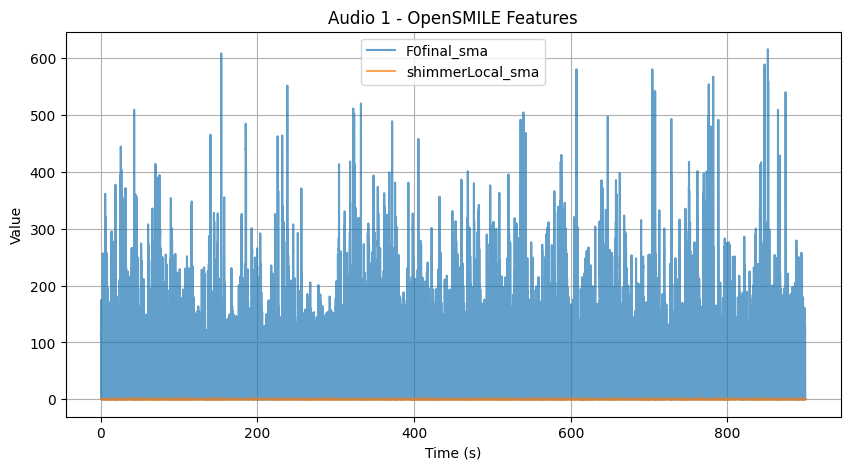

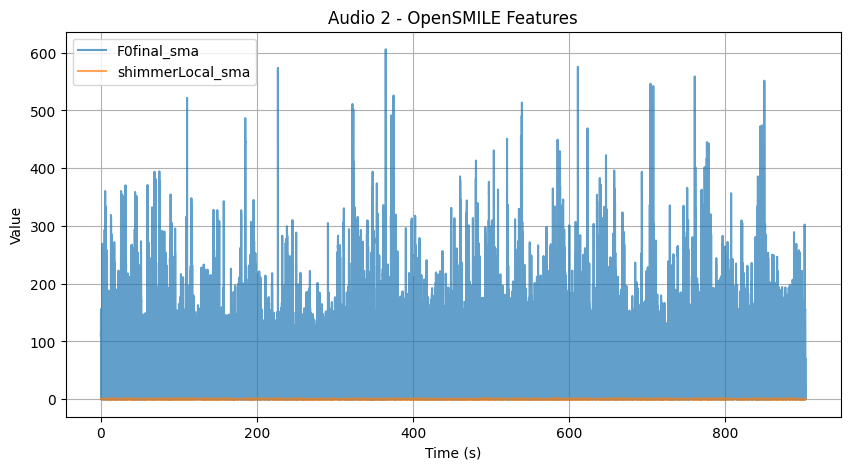

In [ ]:
import pandas as pd
import librosa
import librosa.display
import parselmouth
import opensmile
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze audio using Librosa
def analyze_with_librosa(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    pitch = librosa.yin(y, fmin=50, fmax=400, sr=sr)
    rms = librosa.feature.rms(y=y).flatten()
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    return {"pitch": pitch, "rms": rms, "tempo": tempo, "y": y, "sr": sr}

# Function to analyze audio using Parselmouth
def analyze_with_parselmouth(audio_path):
    snd = parselmouth.Sound(audio_path)
    pitch = snd.to_pitch()
    intensity = snd.to_intensity()
    pitch_values = pitch.selected_array['frequency']
    intensity_values = intensity.values
    return {"pitch": pitch_values, "intensity": intensity_values}

# Function to analyze audio using OpenSmile
def analyze_with_opensmile(audio_path, output_file):
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.ComParE_2016,  # Use a config with LLDs
        feature_level=opensmile.FeatureLevel.LowLevelDescriptors
    )
    features = smile.process_file(audio_path)
    features.to_csv(output_file)
    return output_file  # Return the path to the output file

# Function to plot OpenSMILE LLDs
def plot_opensmile_features(file_path, features_to_plot, title):
    # Load the CSV file
    data = pd.read_csv(file_path, delimiter=",")

    # Convert 'start' to seconds
    if 'start' in data.columns:
        time = pd.to_timedelta(data["start"]).dt.total_seconds()
    else:
        raise ValueError("'start' column not found in OpenSMILE output.")

    # Plot the features
    plt.figure(figsize=(10, 5))
    for feature in features_to_plot:
        if feature in data.columns:
            plt.plot(time, data[feature], label=feature, alpha=0.7)
        else:
            print(f"Feature {feature} not found in OpenSMILE output.")
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()


# Load and analyze audio files
audio_file1 = "05_15m.wav"  # Replace with your audio file path
audio_file2 = "06_15m.wav"  # Replace with your audio file path
output_csv1 = "output1.csv"
output_csv2 = "output2.csv"

# Analyze with OpenSmile
opensmile_results1 = analyze_with_opensmile(audio_file1, output_csv1)
opensmile_results2 = analyze_with_opensmile(audio_file2, output_csv2)

# Plot time-dependent features for both files
features_to_plot = ["F0final_sma", "shimmerLocal_sma"]  # Replace with features you want

# Plot for first audio file
plot_opensmile_features(opensmile_results1, features_to_plot, "Audio 1 - OpenSMILE Features")

# Plot for second audio file
plot_opensmile_features(opensmile_results2, features_to_plot, "Audio 2 - OpenSMILE Features")





Graps

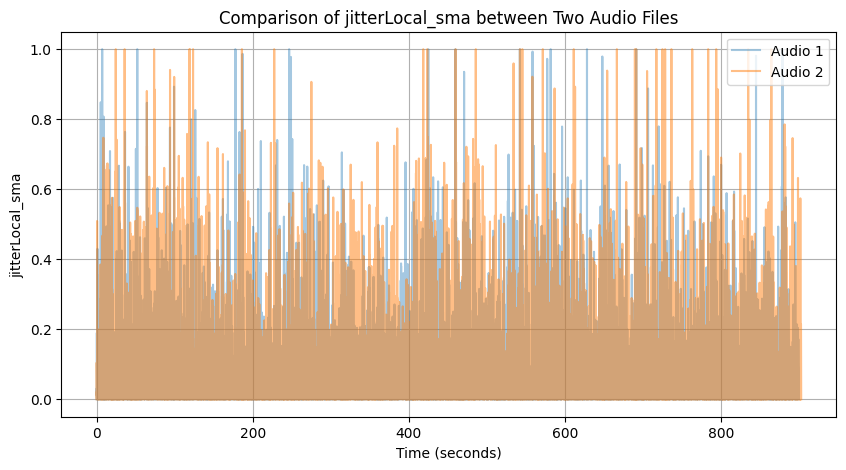

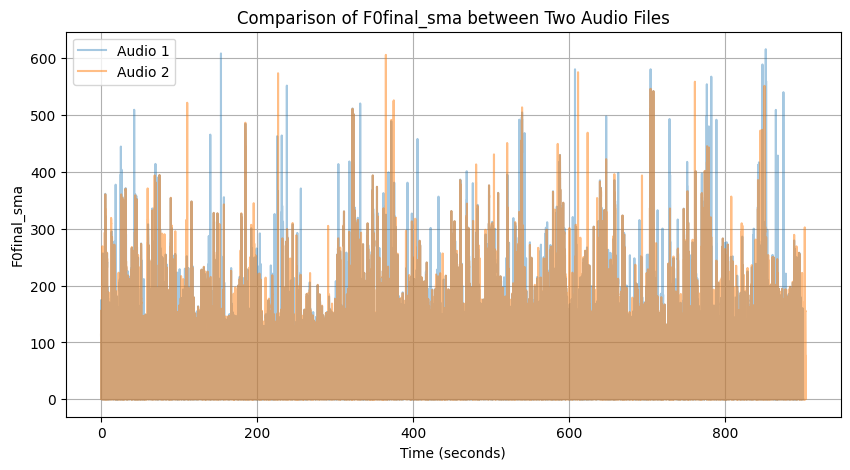

In [ ]:
# Assuming your OpenSmile output files are named 'output1.csv' and 'output2.csv'
file1 = 'output1.csv'
file2 = 'output2.csv'

# Load data from both CSV files
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)


# Convert 'start' column to time in seconds for both DataFrames
time1 = pd.to_timedelta(df1['start']).dt.total_seconds()
time2 = pd.to_timedelta(df2['start']).dt.total_seconds()

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(time1, df1['jitterLocal_sma'], label='Audio 1', alpha=0.4)
plt.plot(time2, df2['jitterLocal_sma'], label='Audio 2', alpha=0.5)
plt.title('Comparison of jitterLocal_sma between Two Audio Files')
plt.xlabel('Time (seconds)')
plt.ylabel('jitterLocal_sma')
plt.legend()
plt.grid(True)
plt.show()


# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(time1, df1['F0final_sma'], label='Audio 1', alpha=0.4)
plt.plot(time2, df2['F0final_sma'], label='Audio 2', alpha=0.5)
plt.title('Comparison of F0final_sma between Two Audio Files')
plt.xlabel('Time (seconds)')
plt.ylabel('F0final_sma')
plt.legend()
plt.grid(True)
plt.show()

The listed features are derived from **openSMILE** (Open Speech and Music Interpretation by Large-space Extraction), a tool for feature extraction in audio processing, especially for speech and paralinguistic analysis. To determine the key features, consider the following based on your task or analysis goal:

### **Key Features and Their Significance**

1. **F0final_sma (Fundamental Frequency)**  
   - **Importance**: Indicates pitch. Useful for analyzing tone, emotion, prosody, or speech pathology.

2. **voicingFinalUnclipped_sma**  
   - **Importance**: Represents the degree of voicing. It’s crucial for distinguishing voiced/unvoiced regions in speech.

3. **jitterLocal_sma, jitterDDP_sma**  
   - **Importance**: Measure pitch instability. Used in voice quality analysis or identifying voice disorders.

4. **shimmerLocal_sma**  
   - **Importance**: Indicates amplitude variation. Relevant for detecting vocal fatigue or issues with voice production.

5. **logHNR_sma (Harmonics-to-Noise Ratio)**  
   - **Importance**: Measures noise in the voice. Useful in analyzing vocal strain or pathology.

6. **audspec_lengthL1norm_sma & audspecRasta_lengthL1norm_sma**  
   - **Importance**: Measure spectral energy and changes over time. Helpful for emotion detection or speech dynamics.

7. **pcm_RMSenergy_sma & pcm_zcr_sma (RMS Energy & Zero-Crossing Rate)**  
   - **Importance**: Energy indicates loudness; ZCR reflects signal noisiness or tonal balance. Useful in speech activity detection or music analysis.

8. **audSpec_Rfilt_sma[0–25]**  
   - **Importance**: Spectral filterbank energies. Capture frequency-specific energy distribution, critical for emotion and speaker recognition tasks.

9. **pcm_fftMag_* Features (Spectral Analysis)**  
   - **Examples**:  
     - **Spectral RollOff**: Indicates bandwidth.  
     - **Spectral Flux**: Captures spectral changes over time.  
     - **Spectral Centroid**: Indicates brightness of sound.  
     - **Spectral Entropy/Variance/Skewness/Kurtosis**: Measure spectral shape and complexity.  
   - **Importance**: Critical for timbre analysis, emotion detection, or music characterization.

10. **pcm_fftMag_psySharpness_sma & pcm_fftMag_spectralHarmonicity_sma**  
    - **Importance**: Reflect perception of sound sharpness and harmonicity, relevant for audio quality assessment.

11. **mfcc_sma[1–14] (Mel-Frequency Cepstral Coefficients)**  
    - **Importance**: Represent sound spectrum in a compact form. Widely used for speech and speaker recognition.

---

### **Prioritizing Features**
The choice of key features depends on your specific application:
- **Emotion Recognition**: F0final_sma, logHNR_sma, MFCCs, spectral centroid, spectral flux.
- **Speech Pathology**: jitterLocal_sma, shimmerLocal_sma, logHNR_sma, voicingFinalUnclipped_sma.
- **Speaker Identification**: MFCCs, spectral shape features, voicing.
- **Audio Classification**: Spectral roll-off, spectral centroid, MFCCs.

If you're combining features, consider applying dimensionality reduction techniques (e.g., PCA) or feature selection methods to optimize your model's performance.

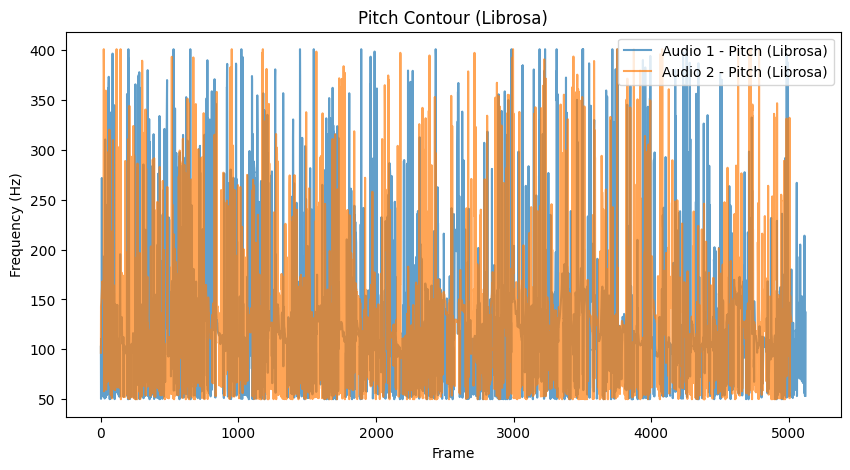

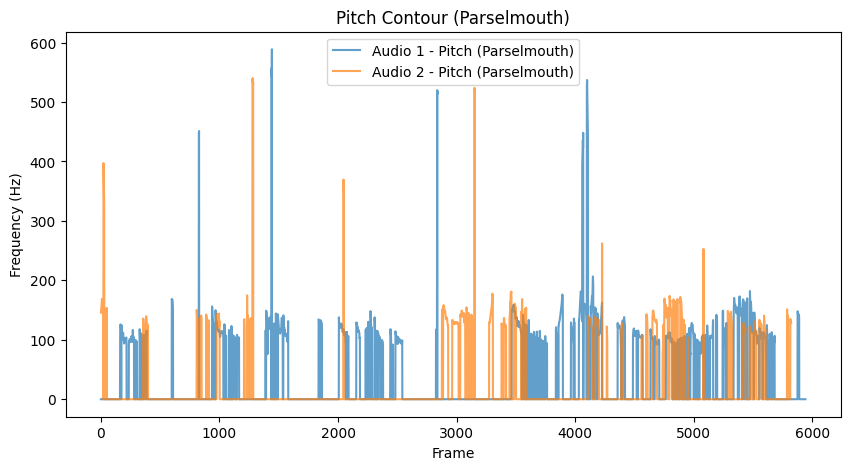

In [ ]:
# Analyze with Librosa
librosa_results1 = analyze_with_librosa(audio_file1)
librosa_results2 = analyze_with_librosa(audio_file2)

# Analyze with Parselmouth
parselmouth_results1 = analyze_with_parselmouth(audio_file1)
parselmouth_results2 = analyze_with_parselmouth(audio_file2)


# Plotting Librosa Results: Pitch Contour
plt.figure(figsize=(10, 5))
plt.plot(librosa_results1["pitch"], label="Audio 1 - Pitch (Librosa)", alpha=0.7)
plt.plot(librosa_results2["pitch"], label="Audio 2 - Pitch (Librosa)", alpha=0.7)
plt.title("Pitch Contour (Librosa)")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.show()

# Plotting Parselmouth Results: Pitch and Intensity
plt.figure(figsize=(10, 5))
plt.plot(parselmouth_results1["pitch"], label="Audio 1 - Pitch (Parselmouth)", alpha=0.7)
plt.plot(parselmouth_results2["pitch"], label="Audio 2 - Pitch (Parselmouth)", alpha=0.7)
plt.title("Pitch Contour (Parselmouth)")
plt.xlabel("Frame")
plt.ylabel("Frequency (Hz)")
plt.legend()
plt.show()